In [27]:
import os
os.getcwd()

'C:\\Users\\sarma_tvxkwyx\\1481053515_ultimate_challenge\\ultimate_challenge'

In [28]:
os.chdir(r'C:\Users\sarma_tvxkwyx\1481053515_ultimate_challenge\ultimate_challenge')
os.getcwd()

'C:\\Users\\sarma_tvxkwyx\\1481053515_ultimate_challenge\\ultimate_challenge'

In [29]:
import pandas as pd

In [30]:
df = pd.read_json('logins.json')

In [31]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [32]:
df['count'] = 1

In [33]:
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [35]:
import datetime
df['intv'] = df['login_time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, 15*(dt.minute//15)))

In [36]:
df['intv1'] = df['login_time'].dt.round('15min')

In [37]:
df.head()

,login_time,count,intv,intv1
0,1970-01-01 20:13:18,1,1970-01-01 20:00:00,1970-01-01 20:15:00
1,1970-01-01 20:16:10,1,1970-01-01 20:15:00,1970-01-01 20:15:00
2,1970-01-01 20:16:37,1,1970-01-01 20:15:00,1970-01-01 20:15:00
3,1970-01-01 20:16:36,1,1970-01-01 20:15:00,1970-01-01 20:15:00
4,1970-01-01 20:26:21,1,1970-01-01 20:15:00,1970-01-01 20:30:00


In [38]:
import matplotlib
%matplotlib inline 

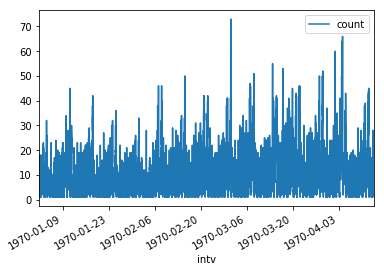

In [39]:
df[['intv', 'count']].groupby('intv').count().plot()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 4 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
intv          93142 non-null datetime64[ns]
intv1         93142 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 2.8 MB


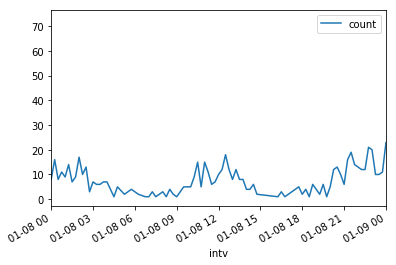

In [68]:
df[['intv', 'count']].groupby('intv').count().plot(xlim=('1970-01-08', '1970-01-09'))

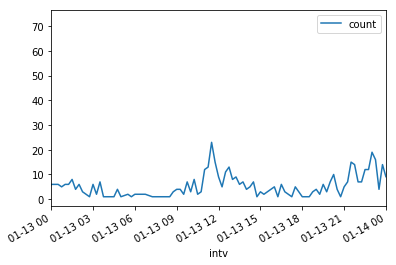

In [42]:
df[['intv', 'count']].groupby('intv').count().plot(xlim=('1970-01-13', '1970-01-14'))

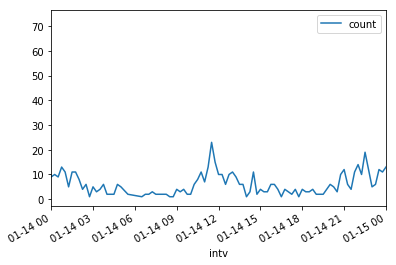

In [43]:
df[['intv', 'count']].groupby('intv').count().plot(xlim=('1970-01-14', '1970-01-15'))

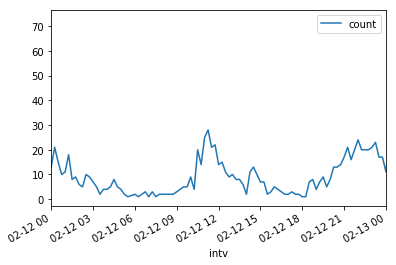

In [44]:
df[['intv', 'count']].groupby('intv').count().plot(xlim=('1970-02-12', '1970-02-13'))

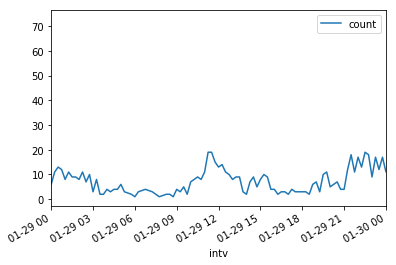

In [45]:
df[['intv', 'count']].groupby('intv').count().plot(xlim=('1970-01-29', '1970-01-30'))

#### Daily Trend
Looking at the above days, the demand generally increases after 9:00am and then again after 9:00pm, spiking every hour after that and then gradually decreases up till 5:00am.

In [46]:
demand_15m = df[['intv', 'count']].groupby('intv').count()

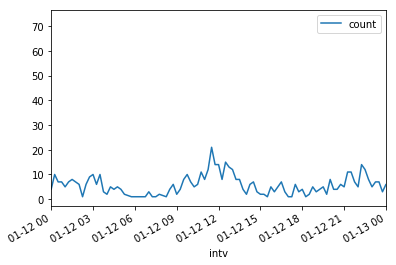

In [47]:
demand_15m.plot(xlim=('1970-01-12', '1970-01-13'))

In [48]:
demand_15m.head()

,count
intv,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [49]:
df['intv_d'] = df['login_time'].dt.round('D')

In [50]:
df.head()

,login_time,count,intv,intv1,intv_d
0,1970-01-01 20:13:18,1,1970-01-01 20:00:00,1970-01-01 20:15:00,1970-01-02
1,1970-01-01 20:16:10,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02
2,1970-01-01 20:16:37,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02
3,1970-01-01 20:16:36,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02
4,1970-01-01 20:26:21,1,1970-01-01 20:15:00,1970-01-01 20:30:00,1970-01-02


In [51]:
demand_daily = df[['intv_d', 'count']].groupby('intv_d').count()

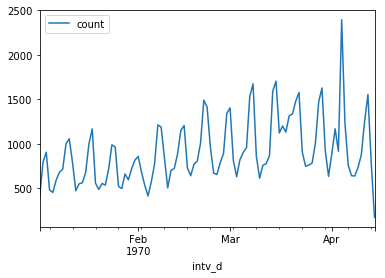

In [52]:
demand_daily.plot()

In [53]:
df.isnull().sum()

login_time    0
count         0
intv          0
intv1         0
intv_d        0
dtype: int64

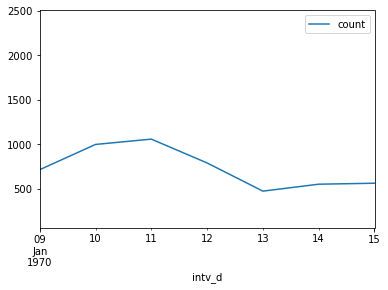

In [54]:
demand_daily.plot(xlim=('1970-01-09', '1970-01-15'))

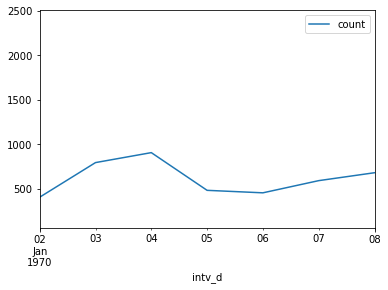

In [55]:
demand_daily.plot(xlim=('1970-01-02', '1970-01-08'))

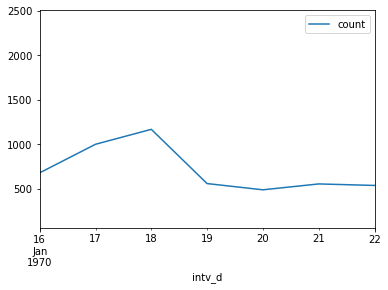

In [56]:
demand_daily.plot(xlim=('1970-01-16', '1970-01-22'))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 5 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
intv          93142 non-null datetime64[ns]
intv1         93142 non-null datetime64[ns]
intv_d        93142 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1)
memory usage: 3.6 MB


In [58]:
df['weekday'] = df.login_time.apply(lambda dt: datetime.datetime.weekday(dt))

In [59]:
df.head()

,login_time,count,intv,intv1,intv_d,weekday
0,1970-01-01 20:13:18,1,1970-01-01 20:00:00,1970-01-01 20:15:00,1970-01-02,3
1,1970-01-01 20:16:10,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3
2,1970-01-01 20:16:37,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3
3,1970-01-01 20:16:36,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3
4,1970-01-01 20:26:21,1,1970-01-01 20:15:00,1970-01-01 20:30:00,1970-01-02,3


In [60]:
df[['count', 'weekday']].groupby('weekday').sum()

,count
weekday,
0,8823
1,9268
2,10339
3,11960
4,15208
5,19377
6,18167


In [61]:
df['week'] = df['login_time'].dt.round('7D')

In [62]:
df.head(15)

,login_time,count,intv,intv1,intv_d,weekday,week
0,1970-01-01 20:13:18,1,1970-01-01 20:00:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
1,1970-01-01 20:16:10,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
2,1970-01-01 20:16:37,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
3,1970-01-01 20:16:36,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
4,1970-01-01 20:26:21,1,1970-01-01 20:15:00,1970-01-01 20:30:00,1970-01-02,3,1970-01-01
5,1970-01-01 20:21:41,1,1970-01-01 20:15:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
6,1970-01-01 20:12:16,1,1970-01-01 20:00:00,1970-01-01 20:15:00,1970-01-02,3,1970-01-01
7,1970-01-01 20:35:47,1,1970-01-01 20:30:00,1970-01-01 20:30:00,1970-01-02,3,1970-01-01
8,1970-01-01 20:35:38,1,1970-01-01 20:30:00,1970-01-01 20:30:00,1970-01-02,3,1970-01-01
9,1970-01-01 20:47:52,1,1970-01-01 20:45:00,1970-01-01 20:45:00,1970-01-02,3,1970-01-01


In [63]:
dfw = df[['count', 'weekday', 'week']].groupby(['week', 'weekday']).sum().groupby('weekday').mean()

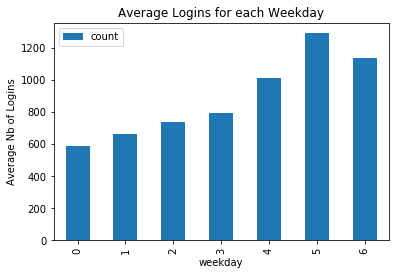

In [64]:
ax = dfw.plot(kind='bar')
ax.set_ylabel('Average Nb of Logins')
ax.set_title('Average Logins for each Weekday')

#### Weekly Trend

The above bar chart gives the average number of logins each day of the week. We see that the demand increases from Monday to Saturday, the Saturday being the highest. The number of logins on Sunday rank second in the entire week. 

### Part 2 - Experiment and Metric Design
#### 1. Key measure of success
I'll choose the total accumulated toll as the key measure of success of the new policy

#### 2. Experiment design

1. I'll measure the total toll before and after implementing the policy. Then, I will find the probability of accumulating the observed toll under the null hypothesis that there is no effect of the policy on the number of bridge crossings. 

2. This can be done by using a single sided z-test. 

3. If the probability falls below a threshold say 0.05, I'd say that the policy had a significant effect in increasing the number of bridge crossings. If the results are significant as determined by the above method and the bridge crossings have increased to a desired threshold i.e. practically important, then I would recommend the city operations team to implement the 

### Part 3 - Predictive Modeling



In [65]:
df1 = pd.read_json('ex.json', orient='records')

In [69]:
df1

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [70]:
# strangely, this does not work
# df2 = pd.read_json('ultimate_data_challenge.json', orient='records')

In [71]:
import json
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df2 = pd.DataFrame(data)

In [72]:
df2.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0


In [73]:
# let's see how many values are null for each column
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [74]:
max(df2.last_trip_date)

u'2014-07-01'

In [75]:
min(df2.last_trip_date)

u'2014-01-01'

In [76]:
import datetime as dt
df2.last_trip_date = df2.last_trip_date.apply(lambda td: pd.to_datetime(td))

In [77]:
df2[df2.last_trip_date >= '07-01-2014']

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2
87,3.06,4.7,5.0,1.00,Winterfell,2014-07-01,iPhone,2014-01-23,0.0,6,True,67.6
96,4.89,4.6,4.1,1.00,Winterfell,2014-07-01,iPhone,2014-01-26,1.9,11,True,76.9
147,5.44,4.6,3.7,1.09,Winterfell,2014-07-01,iPhone,2014-01-25,3.8,7,False,57.7
297,5.93,5.0,5.0,1.00,King's Landing,2014-07-01,iPhone,2014-01-16,0.0,1,False,100.0
305,7.50,4.8,4.0,1.01,King's Landing,2014-07-01,iPhone,2014-01-16,1.7,8,True,70.9
313,2.34,4.9,4.9,1.00,King's Landing,2014-07-01,Android,2014-01-11,0.0,0,True,23.1
350,2.00,4.8,5.0,1.00,King's Landing,2014-07-01,iPhone,2014-01-25,0.0,4,False,64.0
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7
599,6.12,4.9,4.8,1.07,Winterfell,2014-07-01,iPhone,2014-01-06,14.3,11,False,77.1


In [78]:
df2['active'] = df2['last_trip_date'].map(lambda x: 1 if x >= pd.to_datetime('06-01-2014') else 0)

In [79]:
len(df2[df2['active']==0])

31196

In [80]:
len(df2[df2['active']==1])

18804

In [81]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [82]:
df2.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,-0.026791
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,-0.011653
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active,-0.092780,-0.026791,-0.011653,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [84]:
df2.iloc[:,:-1]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [85]:
df3 = df2.drop(['city', 'last_trip_date', 'signup_date'], 1)

In [86]:
df3.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Android,11.8,14,False,82.4,0


In [87]:
df3[['phone', 'active']].groupby('phone').mean()

,active
phone,
Android,0.209426
iPhone,0.448933


In [88]:
df3[['trips_in_first_30_days', 'active']].groupby('active').mean()

,trips_in_first_30_days
active,
0,1.658482
1,3.306318


In [89]:
df3.phone = df3.phone.apply(lambda x: 1 if x=='iPhone' else 0)

In [90]:
df3.ultimate_black_user = df3.ultimate_black_user.apply(lambda x: 1 if x==True else 0)

In [91]:
df3.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,1,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,0,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,1,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,1,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,0,11.8,14,0,82.4,0


In [92]:
df3[['ultimate_black_user', 'phone', 'active']].groupby(['phone', 'ultimate_black_user']).mean()

active
phone ultimate_black_user          
0     0                    0.168341
      1                    0.303318
1     0                    0.363794
      1                    0.577302

In [93]:
df3.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
phone                        0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
active                       0
dtype: int64

In [94]:
df3.shape

(50000, 10)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,:-1], df3.iloc[:,-1], test_size=0.3)

In [96]:
from sklearn.preprocessing import Imputer
im = Imputer(strategy='mean')
X_train_ = im.fit_transform(X_train)
X_test_ = im.fit_transform(X_test)

In [97]:
#let's see what columns are selected by the KBest selector

selector = SelectKBest(chi2, k=3).fit(X_train_, y_train)
X_train_new = selector.transform(X_train_)
X_test_new = selector.transform(X_test_)

In [98]:
pd.DataFrame(X_train_new).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [99]:
X_train_new

array([[  8.07,   0.  ,   0.  ],
       [  3.86,   0.  ,   1.  ],
       [ 13.97,   1.  ,   1.  ],
       ..., 
       [  2.32,   6.  ,   0.  ],
       [  2.13,   1.  ,   0.  ],
       [  3.08,   0.  ,   1.  ]])

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import fbeta_score, make_scorer, recall_score
from sklearn.metrics import classification_report

In [101]:
Xlr = X_train_
ylr = y_train
Xtestlr = X_test_
ytestlr = y_test

In [107]:
# Set the parameters by cross-validation

C_ = [0.0001, 0.001, 0.01, 0.1]
tuned_parameters = {'C':C_ , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'class_weight': [None, 'balanced']}

scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                     scoring='%s' % score)
    clf.fit(Xlr, ylr)

    print("Best parameters set found on development set:")
    print
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = ytestlr, clf.predict(Xtestlr)
    print(classification_report(y_true, y_pred))
    print

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.001, 'solver': 'lbfgs', 'class_weight': None}

Grid scores on development set:

0.713 (+/-0.021) for {'C': 0.0001, 'solver': 'newton-cg', 'class_weight': None}
0.713 (+/-0.021) for {'C': 0.0001, 'solver': 'lbfgs', 'class_weight': None}
0.711 (+/-0.021) for {'C': 0.0001, 'solver': 'liblinear', 'class_weight': None}
0.713 (+/-0.022) for {'C': 0.0001, 'solver': 'sag', 'class_weight': None}
0.538 (+/-0.011) for {'C': 0.0001, 'solver': 'newton-cg', 'class_weight': 'balanced'}
0.538 (+/-0.011) for {'C': 0.0001, 'solver': 'lbfgs', 'class_weight': 'balanced'}
0.530 (+/-0.012) for {'C': 0.0001, 'solver': 'liblinear', 'class_weight': 'balanced'}
0.537 (+/-0.012) for {'C': 0.0001, 'solver': 'sag', 'class_weight': 'balanced'}
0.718 (+/-0.017) for {'C': 0.001, 'solver': 'newton-cg', 'class_weight': None}
0.718 (+/-0.018) for {'C': 0.001, 'solver': 'lbfgs', 'class_weight': None}
0.707 (+/-0.018) for {'C':

In [108]:
clf = LogisticRegression(C=0.1, solver='lbfgs', class_weight='balanced')
clf.fit(Xlr,ylr)
cnf_matrix = confusion_matrix(ytestlr, clf.predict(Xtestlr))
cnf_matrix

array([[6450, 2881],
       [2187, 3482]])

In [109]:
clf.coef_

array([[ -2.86062975e-02,  -7.26659634e-02,  -4.38252513e-02,
         -4.71297476e-01,   1.04237785e+00,   6.96882768e-03,
          1.21607241e-01,   8.08214933e-01,   2.52055138e-05]])

#### Most important factors

We observe that the largest coefficients are 1.04 for column 5 and 0.808 for column 8. These columns are 'phone' and 'ultimate_black_user' respectively. We observe that people who have iphone are more likely to be active and those who are ultimate_black_user are also more likely to be active.

In [112]:
# we see that mean value of active is much closer to zero for android
df3[['phone', 'active']].groupby('phone').mean()

,active
phone,
0,0.212673
1,0.448933


In [113]:
# we see that mean value of active is much closer to zero for non-ultimate black users
df3[['ultimate_black_user', 'active']].groupby('ultimate_black_user').mean()

,active
ultimate_black_user,
0,0.298818
1,0.503713


In [114]:
df3[['ultimate_black_user', 'phone', 'active']].groupby(['phone', 'ultimate_black_user']).mean()

active
phone ultimate_black_user          
0     0                    0.168341
      1                    0.303318
1     0                    0.363794
      1                    0.577302

In the above frame, we see that the highest proportion of active users is found among the iphone users who took the ultimate black in the first 30 days. Whereas, the lowest proportion of active users is found among the android users who did not take the ultimate black.This is consistent with the findings from the coefficients of the logistic regression classifier.

#### Recommendation
Based on our observations, we recommend that more incentive should be provided to the android users to take the ultimate black. There may be something deficient in the user interface of the android phones that is either making it difficult for people to take the ultimate black or it is not advertising the service enough on the android app. They may look into these aspects to make more people stay active.